In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import os
import gc

num_folds = 10

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = pd.read_csv("../data/first_round_training_data.csv", encoding='gbk')
labels = data.Quality_label
features = data.drop(["Quality_label"], axis=1)

In [3]:
features.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,6.856075,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0.000362,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,0.022201,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,1.459004,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,11.576647,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496


In [4]:
one_hot = LabelEncoder()
labels = one_hot.fit_transform(labels)
labels = pd.DataFrame(labels)
labels.head()

,0
0,3
1,1
2,1
3,1
4,1


In [5]:
features.describe()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,485.198954,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04,35.902066,5.351032e+04,8.842895e+04,202.732522,6.271156e+03,1.285985e+06,3.400877e+03,3.166863e+04,4.545394e+05,7.860735e+05,1.989520e+07
std,11401.971393,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06,101.629348,1.894866e+06,2.854543e+06,2754.503943,2.585508e+05,9.850723e+07,1.999508e+05,1.116889e+06,2.847995e+07,5.885757e+07,1.529785e+09
min,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024,6.457597e-10,5.493777e-09,0.000001,4.344229e-06,1.635864e-06,5.456653e-05,4.411611e-03,3.011145e-03,2.366726e-03,1.974795e-03
25%,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478,3.100601e-02,3.173294e-02,0.098178,1.319373e-01,1.150362e-01,1.443224e-01,1.135895e-01,1.115708e-01,1.267717e-01,1.253268e-01
50%,1.050304,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01,0.727611,9.449563e-01,1.030499e+00,0.945947,8.297855e-01,7.539155e-01,9.864325e-01,5.891701e-01,5.922906e-01,6.644951e-01,6.705953e-01
75%,10.938565,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00,13.969790,2.784766e+01,3.001000e+01,9.803828,6.052952e+00,5.736029e+00,7.422284e+00,4.637157e+00,4.773050e+00,5.571728e+00,4.905501e+00
max,713682.207601,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08,517.197610,1.197060e+08,1.615907e+08,128491.084741,1.572225e+07,7.630284e+09,1.488592e+07,7.789923e+07,2.187522e+09,4.558485e+09,1.184961e+11


In [6]:
A1 = features.Attribute1
A2 = features.Attribute2
A3 = features.Attribute3
A4 = features.Attribute4
A5 = features.Attribute5
A6 = features.Attribute6
A7 = features.Attribute7
A8 = features.Attribute8
A9 = features.Attribute9
A10 = features.Attribute10
features = features.drop(['Attribute1','Attribute2','Attribute3','Attribute4','Attribute5',
                          'Attribute6','Attribute7','Attribute8','Attribute9','Attribute10'], axis=1)
features.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385


In [7]:
A1

0            6.856075
1            0.000362
2            0.022201
3            1.459004
4           11.576647
5            0.001555
6           10.690637
7            0.057851
8          120.791843
9            0.000306
10           0.013220
11           5.271388
12           5.544410
13           0.000064
14      153859.966194
15          34.338331
16           0.106477
17           2.275503
18           0.000295
19          67.862002
20        1946.048210
21           0.095301
22           0.001421
23          87.940106
24           2.520895
25           0.008479
26          44.612394
27      198030.379950
28           0.800728
29           0.140859
            ...      
5970        81.283824
5971         0.002513
5972      1012.897535
5973         0.003542
5974        12.817105
5975         0.877655
5976        14.524810
5977         0.147805
5978         0.177174
5979         1.120227
5980       468.435454
5981         0.007277
5982        11.681896
5983       831.947308
5984      

In [8]:
test_data = pd.read_csv("../data/first_round_testing_data.csv", encoding='gbk')
test_data.head()

,Group,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
0,0,0.235279,0.195680,0.351488,0.186814,0.086456,1.434060,1.230409,0.038483,2.931083,2.005852
1,0,0.043799,0.523976,32.590688,0.886285,29.702490,0.027434,0.016852,0.600827,0.118077,887.611257
2,0,21.466737,0.523976,11.847792,79499.554454,13544.605343,0.027434,0.016852,0.600827,0.118077,887.611257
3,0,0.703795,0.010192,0.018080,317.015599,38.087562,0.428092,0.314162,0.038483,17.850021,0.051850
4,0,10.447960,0.010192,15.983891,0.996049,16.715690,0.477823,0.464037,0.038483,17.850021,0.051850


In [9]:
test_features = test_data.drop(['Group'], axis=1)
test_features.head()

,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
0,0.235279,0.195680,0.351488,0.186814,0.086456,1.434060,1.230409,0.038483,2.931083,2.005852
1,0.043799,0.523976,32.590688,0.886285,29.702490,0.027434,0.016852,0.600827,0.118077,887.611257
2,21.466737,0.523976,11.847792,79499.554454,13544.605343,0.027434,0.016852,0.600827,0.118077,887.611257
3,0.703795,0.010192,0.018080,317.015599,38.087562,0.428092,0.314162,0.038483,17.850021,0.051850
4,10.447960,0.010192,15.983891,0.996049,16.715690,0.477823,0.464037,0.038483,17.850021,0.051850


In [10]:
def kfold_lightgbm(train_df, test_df, y, num_folds, attribute, stratified=False, debug=False):
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=17)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=17)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = train_df.columns.tolist()
    test_df = test_df[feats]
    #test_df = csr_matrix(test_df)
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, y)):
        print('FOLD {}'.format(n_fold))
        train_x, train_y = train_df.iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], y.iloc[valid_idx]
 
        # LightGBM parameters found by Bayesian optimization
        
        lgb_params =  {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': 'mae',
            #"n_estimators":10000,
            "learning_rate": 0.001,
#             "num_class": 4,
            'num_leaves': 60,
            'subsample': 0.6143,
            'colsample_bytree': 0.6453,
            'min_split_gain': np.power(10, -2.5988),
            'reg_alpha': np.power(10, -2.2887),
            'reg_lambda': np.power(10, 1.7570),
            'min_child_weight': np.power(10, -0.1477),
            'max_depth': -1,
            #'zero_as_missing':True
        }
        
        '''
        lgb_params = {
            'objective': 'regression',
            'metric': 'rmse',
            'learning_rate': 0.01,
            'num_leaves': 16,
            'max_depth': -1,
            'min_child_samples': 1,
            'max_bin': 300,
            'subsample': 1.0,
            'subsample_freq': 1,
            'colsample_bytree': 0.5,
            'min_child_weight': 10,
            'reg_lambda': 0.1,
            'reg_alpha': 0.0,
            'scale_pos_weight': 1,
            'zero_as_missing': True,
            'num_threads': -1,
        }
        
        lgb_params = {   
            'task': 'train',
            'boosting_type': 'gbdt', 
            'objective': 'mape',
            'metric': 'mape',
            'learning_rate': 0.01, 
            'num_leaves': 68, 
            'max_depth': 7,                
            'subsample': 0.8, 
            'colsample_bytree': 0.8, 
            'min_child_samples': 20, 
            'min_child_weight': 0.001,
            'bagging_fraction': 1.0, 
            'feature_fraction': 0.7
        }
        '''
        
        lgtrain = lgb.Dataset(train_x, train_y,
                        feature_name=feats) #categorical_feature = 'auto'
        lgvalid = lgb.Dataset(valid_x, valid_y,
                        feature_name=feats)
        clf = lgb.train(
            lgb_params,
            lgtrain,
            num_boost_round=50000, # 50000
            valid_sets=[lgtrain, lgvalid],
            valid_names=['train','valid'],
            early_stopping_rounds=1000,
            verbose_eval=100
        )
        
         
       # clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            #eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)
 
        #oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        #sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration)
        sub_preds += clf.predict(test_df, num_iteration=clf.best_iteration)/ folds.n_splits
        clf.save_model("../models/cty_lgb_fold_" + attribute + str(n_fold) + ".txt")
         
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importance()

        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        #print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        print('Fold %2d mae : %.6f' % (n_fold, mean_absolute_error(valid_y, oof_preds[valid_idx])))      
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()
 
    mae = mean_absolute_error(y, oof_preds)
    #print('Full AUC score %.6f' % roc_auc_score(y, oof_preds))
    print('Full mae score %.6f' % mae)
     
    display_importances(feature_importance_df, attribute)
    return feature_importance_df, sub_preds

# 显示特征对于训练的重要性
def display_importances(feature_importance_df_, attribute):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 6))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig("../images/cty_"+ attribute +"_importances.png")

FOLD 0
Training until validation scores don't improve for 1000 rounds.
[100]	train's l1: 109912	valid's l1: 64527.5
[200]	train's l1: 107153	valid's l1: 61468.6
[300]	train's l1: 104663	valid's l1: 58796.7
[400]	train's l1: 102411	valid's l1: 56305.5
[500]	train's l1: 100372	valid's l1: 53995.5
[600]	train's l1: 98484	valid's l1: 51735.3
[700]	train's l1: 96791	valid's l1: 49789.3
[800]	train's l1: 95291.9	valid's l1: 48008.2
[900]	train's l1: 93922.7	valid's l1: 46420.6
[1000]	train's l1: 92657.8	valid's l1: 45047.4
[1100]	train's l1: 91532.3	valid's l1: 43829.7
[1200]	train's l1: 90533	valid's l1: 42759.3
[1300]	train's l1: 89644.1	valid's l1: 41883.9
[1400]	train's l1: 88895.7	valid's l1: 41028
[1500]	train's l1: 88273.7	valid's l1: 40300.4
[1600]	train's l1: 87809.1	valid's l1: 39811.5
[1700]	train's l1: 87455	valid's l1: 39459.2
[1800]	train's l1: 87298.3	valid's l1: 39266.3
[1900]	train's l1: 87235.1	valid's l1: 39177.1
[2000]	train's l1: 87371.2	valid's l1: 39224.1
[2100]	train'

[2600]	train's l1: 91811.7	valid's l1: 46042.1
[2700]	train's l1: 92622.4	valid's l1: 47114.4
Early stopping, best iteration is:
[1759]	train's l1: 88299.8	valid's l1: 40876.4
Fold  5 mae : 40876.424903
FOLD 6
Training until validation scores don't improve for 1000 rounds.
[100]	train's l1: 106119	valid's l1: 79836.9
[200]	train's l1: 103371	valid's l1: 77264.5
[300]	train's l1: 100909	valid's l1: 74959.5
[400]	train's l1: 98656	valid's l1: 72880.2
[500]	train's l1: 96627.6	valid's l1: 71105.9
[600]	train's l1: 94780.9	valid's l1: 69475
[700]	train's l1: 93119.8	valid's l1: 68174
[800]	train's l1: 91589.5	valid's l1: 67008
[900]	train's l1: 90236.8	valid's l1: 66024.2
[1000]	train's l1: 89008.5	valid's l1: 65526.5
[1100]	train's l1: 87881.2	valid's l1: 65046
[1200]	train's l1: 86890.6	valid's l1: 64698
[1300]	train's l1: 86005.4	valid's l1: 64207.5
[1400]	train's l1: 85243.3	valid's l1: 63952
[1500]	train's l1: 84624.7	valid's l1: 63841
[1600]	train's l1: 84147.5	valid's l1: 63959.7
[1

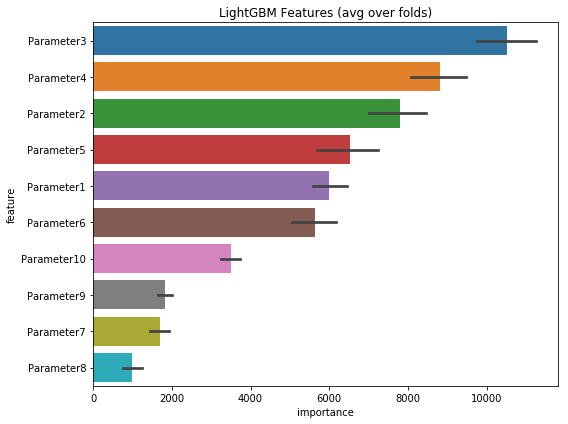

In [11]:
A1_feature_importance, A1_test_score = kfold_lightgbm(features, test_features, A1, num_folds, attribute='A1')